In [1]:
KEY_PATH = "../ebird_api.key"
EBIRD_KEY = ""

with open(KEY_PATH) as f:
    EBIRD_KEY = f.read()
_ = """
If you get an error (i.e. FileNotFoundError), that means you don't have the API
key set up. You MUST request your own API key. It is intentionally excluded
from the git repo (via gitignore).
"""

In [10]:
import requests
import pandas as pd

In [12]:
# San Jose, 37.33 N, 121.86 W
url = "https://api.ebird.org/v2/data/obs/geo/recent?lat=37.33&lng=-121.86"

payload= {}
headers = {
    'X-eBirdApiToken': EBIRD_KEY
}

resp_recent = requests.request("GET", url, headers=headers, data=payload)
resp_recent = pd.read_json(resp_recent.text)

In [22]:
species = resp_recent['speciesCode']
species.head()

0    mallar3
1     rocpig
2     eucdov
3    comgal1
4     ribgul
Name: speciesCode, dtype: object

In [32]:
df_list = []

# only do the front 5
for s in species[:5]:
    url = f"https://api.ebird.org/v2/data/obs/geo/recent/{s}?lat=37.33&lng=-121.86"
    response = requests.request("GET", url, headers=headers, data=payload)
    df = pd.read_json(response.text)
    df_list.append(df)

In [66]:
df = pd.concat(df_list)
df = df.fillna({'howMany': 1})
df.head()

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId,exoticCategory
0,mallar3,Mallard,Anas platyrhynchos,L1305605,Sunnyvale WPCP--Landfill,2025-07-12 16:32,45.0,37.419908,-122.020233,True,False,False,S259341792,NaN
1,mallar3,Mallard,Anas platyrhynchos,L36922683,park,2025-07-12 15:25,2.0,37.235394,-121.974472,True,False,True,S259334063,NaN
2,mallar3,Mallard,Anas platyrhynchos,L730351,Charleston Slough/Coast Casey Forebay,2025-07-12 12:19,1.0,37.435919,-122.098918,True,False,False,S259322235,NaN
3,mallar3,Mallard,Anas platyrhynchos,L47260623,Riverview Stormwater Garden,2025-07-12 12:00,8.0,37.402099,-121.946021,True,False,True,S259318194,NaN
4,mallar3,Mallard,Anas platyrhynchos,L776550,Salt Pond A1,2025-07-12 10:30,1.0,37.437930,-122.088661,True,False,False,S259305479,NaN


In [70]:
import seaborn as sns

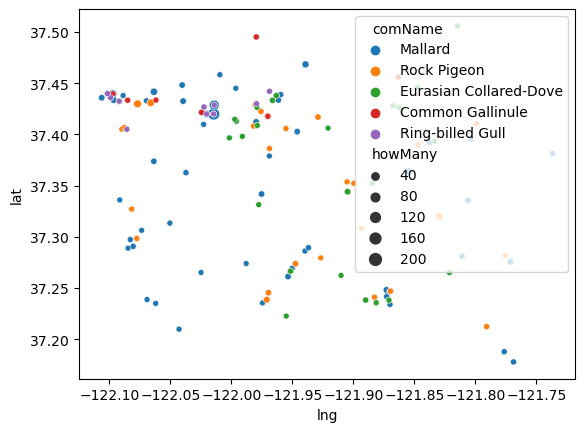

In [80]:
fig = sns.scatterplot(df, x='lng', y='lat', size='howMany', hue='comName')

In [40]:
import plotly.express as px

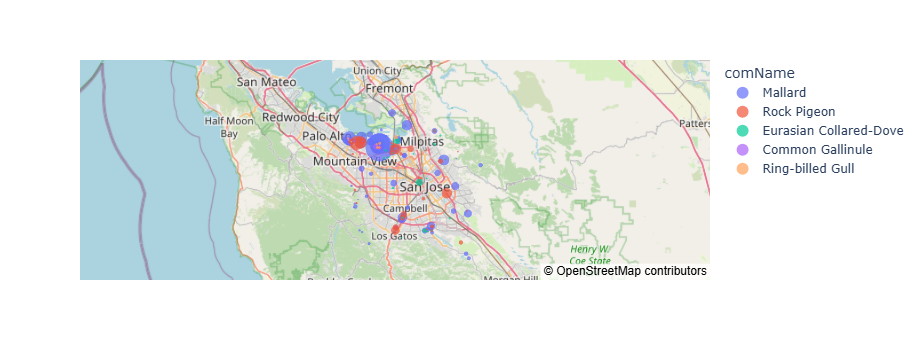

In [72]:
fig = px.scatter_mapbox(df, lat='lat', lon='lng', size='howMany', color='comName')
fig.update_mapboxes(style='open-street-map')
fig.show()